In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import STL

In [135]:
electricity = pd.read_csv('Electric_Production.csv')

In [136]:
electricity.dtypes

DATE      object
Value    float64
dtype: object

In [137]:
electricity.DATE = pd.to_datetime(electricity.DATE)

In [138]:
electricity.DATE.isna().any()

False

In [139]:
electricity.DATE.count()

397

In [140]:
electricity

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


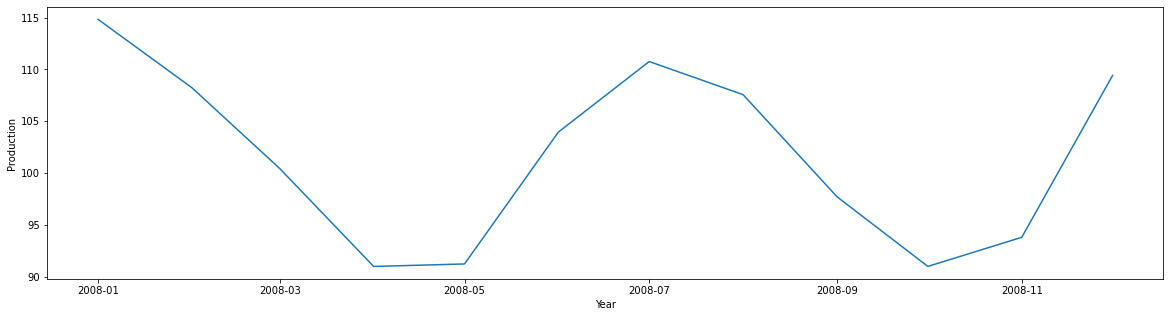

In [141]:
year_2008 = electricity[electricity.DATE.dt.year ==2008]

plt.figure(figsize=(20,5))
plt.plot(year_2008.DATE, year_2008.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

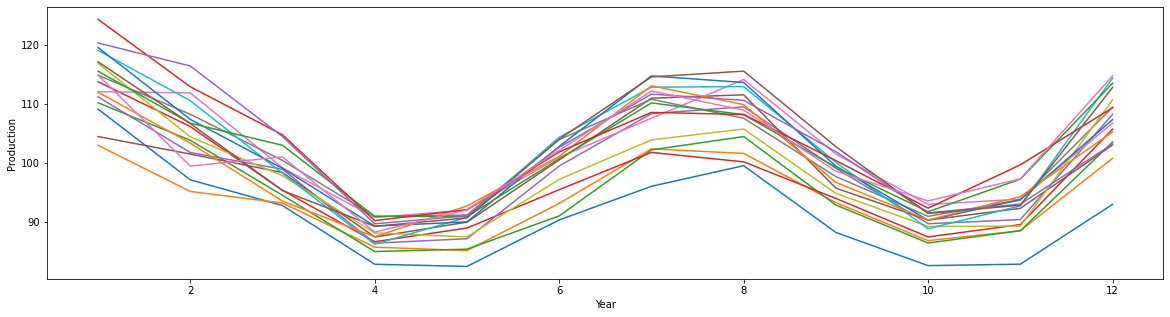

In [142]:
plt.figure(figsize=(20,5))

for year in range(2001,2018):
    current_year = electricity[electricity.DATE.dt.year == year]
    plt.plot(current_year.DATE.dt.month, current_year.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

In [143]:
electricity['year']=electricity.DATE.dt.year
electricity['month']=electricity.DATE.dt.month

In [144]:
electricity =electricity.drop(columns="DATE")

In [145]:
electricity

,Value,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [146]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])

In [147]:
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2)

In [148]:
linear_algo = Ridge(alpha=10)
linear_algo.fit(attributes_train,targets_train)

Ridge(alpha=10)

In [149]:
linear_algo.score(attributes_train,targets_train)

0.7072479070694244

In [150]:
linear_algo.score(attributes_test,targets_test)

0.717086977056496

In [151]:
test_pred = linear_algo.predict(attributes_test)

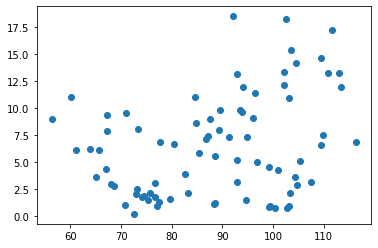

In [152]:
plt.scatter(targets_test, np.abs(test_pred-targets_test))

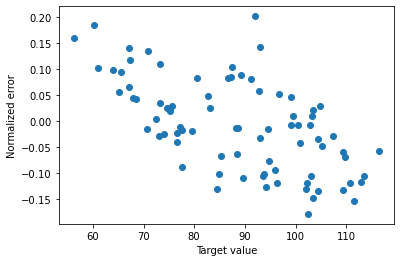

In [153]:
plt.scatter(targets_test, (test_pred-targets_test) /targets_test)

plt.xlabel("Target value")
plt.ylabel("Normalized error")
plt.show()

high bias because residuals are not random

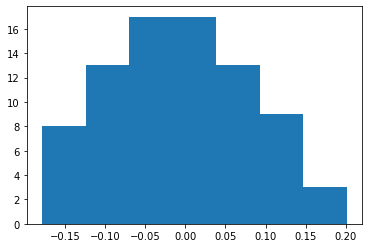

In [154]:
plt.hist(((test_pred-targets_test) / targets_test), bins="fd")
plt.show()

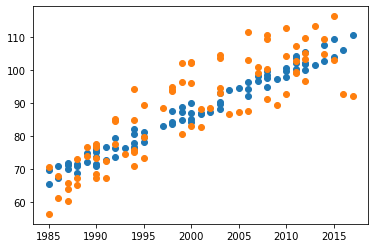

In [155]:
plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [156]:
electricity.shift(1)["Value"]
# shift buta zapisite nadolu ako e polojitelno chislo
# shift buta zapisite nagore ako e negativno chislo

0           NaN
1       72.5052
2       70.6720
3       62.4502
4       57.4714
         ...   
392    108.9312
393     98.6154
394     93.6137
395     97.3359
396    114.7212
Name: Value, Length: 397, dtype: float64

In [157]:
# this is linear correlation
electricity["Value"].corr(electricity.shift(1)["Value"])

0.8717308657532122

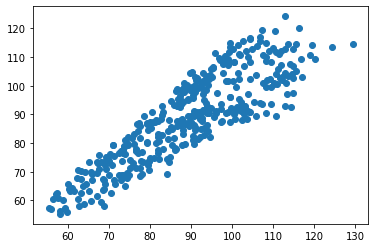

In [158]:
plt.scatter(electricity["Value"],electricity.shift(1)["Value"])

In [159]:
electricity["Value"].corr(electricity.shift(2)["Value"])

0.6465816539907929

In [160]:
electricity["Value"].corr(electricity.shift(3)["Value"])

0.5355867575850729

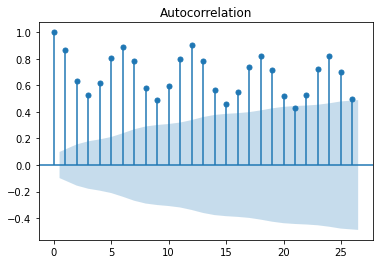

In [161]:
plot_acf(electricity.Value)
plt.show()

# strong periodicity on every 6 months so these are good predictions
# the blue zone is the confidence interval for error, 95 % CI
# if the value is in the blue zone we believe it is not significant

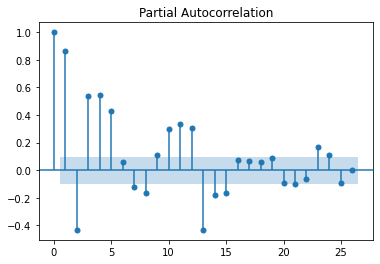

In [162]:
plot_pacf(electricity.Value)
plt.show()
# looking at the lags in the past
# difference between the previous and the current shifted value
# these are used in ARIMA models

In [163]:
for lag in range(24):
    electricity[f"lag_{lag}"] = electricity.Value.shift(lag)

In [164]:
# remove the nan values
electricity = electricity.dropna()

In [165]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2,random_state=33)

In [166]:
pca = PCA(n_components= 0.98)

In [167]:
pca.fit(attributes_train)

PCA(n_components=0.98)

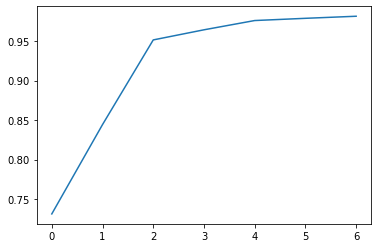

In [168]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [169]:
linear_ar_model = Ridge(
    alpha =10
)
linear_ar_model.fit(attributes_train,targets_train)

Ridge(alpha=10)

In [170]:
linear_ar_model.score(attributes_train,targets_train)

0.9999990871680084

In [171]:
linear_ar_model.score(attributes_test,targets_test)

0.9999987387253423

In [172]:
test_pred = linear_ar_model.predict(attributes_test)

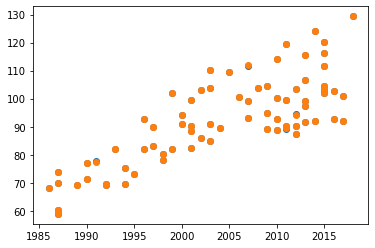

In [173]:
plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [174]:
electricity

,Value,year,month,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
23,68.1354,1986,12,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,...,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
24,73.8152,1987,1,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,...,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
25,70.0620,1987,2,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,...,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
26,65.6100,1987,3,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,...,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
27,60.1586,1987,4,60.1586,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,...,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
393,93.6137,2017,10,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
394,97.3359,2017,11,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203
395,114.7212,2017,12,114.7212,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,...,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837


In [175]:
linear_ar_model.coef_

array([-3.87482556e-04,  1.33681976e-03,  9.94620932e-01,  3.30966933e-03,
       -5.14999388e-04,  6.38012440e-04, -1.65528185e-04,  6.11029034e-05,
       -1.23362975e-04, -2.82657909e-05, -5.00703031e-04, -4.78341143e-05,
        2.23700107e-04,  2.76723015e-04,  2.85340739e-03, -1.52730442e-03,
        7.47769818e-04, -8.68431118e-04,  2.06421279e-04,  7.12161213e-04,
       -4.82443562e-05,  5.92936233e-04, -2.31792271e-04, -5.56292657e-04,
        4.39040493e-06,  3.92754384e-04])

In [188]:
stl = STL(
    electricity.Value,
    period = 12
)

In [189]:
result = stl.fit()

<Figure size 1584x720 with 0 Axes>

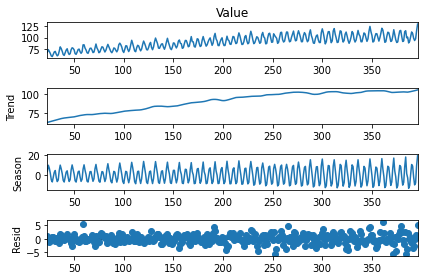

In [190]:
plt.figure(figsize=(22,10))
result.plot()
plt.show()
# here is show the trend